In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk

In [2]:
X_train_transaction = pd.read_csv('train_transaction.csv')
X_train_identify = pd.read_csv('train_identity.csv')
X_test_transaction = pd.read_csv('test_transaction.csv')
X_test_identify = pd.read_csv('test_identity.csv')
X_train = X_train_identify.merge(X_train_transaction, how='outer')
X_test = X_test_identify.merge(X_test_transaction, how='outer')

In [3]:
print("Training Data Shape: \t", X_train.shape)
print("Test Data Shape:\t", X_test.shape)

Training Data Shape: 	 (590540, 434)
Test Data Shape:	 (506691, 433)


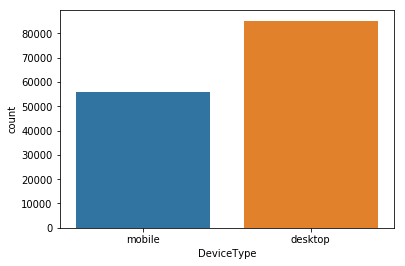

In [4]:
sns.countplot(x='DeviceType',data=X_train)

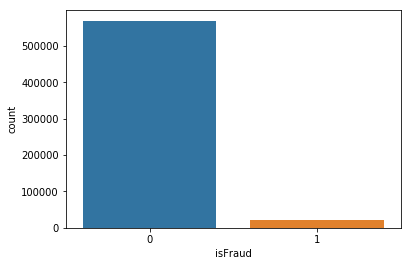

In [5]:
sns.countplot(x='isFraud',data=X_train)

In [6]:
y_train = X_train['isFraud']
X_train.drop(['isFraud'],axis=1,inplace=True)

In [7]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [8]:
X_train.columns[X_train.dtypes==object]

Index(['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6',
       'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6',
       'M7', 'M8', 'M9'],
      dtype='object')

In [9]:
X_test.columns[X_test.dtypes==object]

Index(['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6',
       'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6',
       'M7', 'M8', 'M9'],
      dtype='object')

In [10]:
categorical_columns = X_train.columns[X_train.dtypes==object].tolist()
numerical_columns = [x for x in X_train.columns.tolist() if x not in categorical_columns]

In [11]:
for i in categorical_columns:
    X_train = pd.concat([X_train, pd.get_dummies(X_train[i])],axis=1)
    X_test = pd.concat([X_test, pd.get_dummies(X_test[i])],axis=1)
    X_test.drop([i],axis=1,inplace=True)
    X_train.drop([i],axis=1,inplace=True)

In [12]:
print(X_train.shape, X_test.shape)

(590540, 2833) (506691, 3416)


In [13]:
X_train = X_train.fillna(-9999)
X_test = X_test.fillna(-9999)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4)
print("Training Data Shape: \t", x_train.shape, y_train.shape)
print("Test Data Shape:\t", x_test.shape, y_test.shape)

Training Data Shape: 	 (354324, 2833) (354324,)
Test Data Shape:	 (236216, 2833) (236216,)


In [16]:
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)

/Users/RohitM/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(lr.predict(x_test),y_test)

0.9665052324990686

In [21]:
print(x_test.shape)

(236216, 2833)


In [24]:

prediction = lr.predict_proba(x_test)


In [ ]:
submission = pd.DataFrame()
fraud = 0
for (i,_),p in zip(prediction,x_test['TransactionID'].tolist()):
    submission = submission.append(pd.DataFrame({'TransactionID': p,'isFraud':i},index=[0]),ignore_index=True,sort=False)
    if i>=0.5:
        fraud += 1
print(fraud, len(prediction)-fraud)

In [ ]:
submission.to_csv('submission.csv')